In [1]:
import pickle
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scienceplots
from tqdm import tqdm
from shapely import LineString, Point
from seaborn import displot, histplot, relplot
plt.style.use(['nature'])

from waymo_devkit.conflict import Conflict

Construct the `Conflict` objects from dicts

In [2]:
with open('./pkl/conflict_pet15s.pkl', 'rb') as file:
    conflict_list_from_pickle = pickle.load(file)
print(f"#Conflicts: {len(conflict_list_from_pickle)}")

conflict_list = list()
for c in conflict_list_from_pickle:
    conflict_list.append(
        Conflict(
            leader_id=c['leader_id'],
            leader_index=c['leader_index'],
            leader_states=c['leader_states'],
            leader_time_at_conflict=c['leader_time_at_conflict'],
            follower_id=c['follower_id'],
            follower_index=c['follower_index'],
            follower_states=c['follower_states'],
            follower_time_at_conflict=c['follower_time_at_conflict'],
            PET=c['PET'],
            conflict_type=c['conflict_type'],
            leader_is_av=c['leader_is_av'],
            follower_is_av=c['follower_is_av'],
            center=c['center'],
            radius=c['radius'],
    ))
assert len(conflict_list) == len(conflict_list_from_pickle)

#Conflicts: 889


In [3]:
palette = {
    "HV-HV" : '#257ab6', 
    "AV-HV" : '#31a231',
    "HV-AV" : '#ff8214',
}

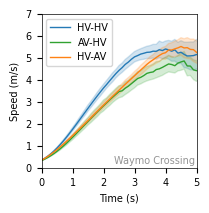

In [4]:
import seaborn as sns
import pandas as pd
v_threshold = 0.3

plt.figure(figsize=(2,2))
df = pd.DataFrame(columns=['timestamp', 'speed', 'vehicle type'])

for index, c in enumerate(conflict_list):
    if c.conflict_type == "CROSS" and c.two_vehicles_co_exist and c.PET <= 10:
        mask = c.follower_beforeConflict_speeds_followerReach > v_threshold
        reversed_mask = mask[::-1]
        first_false_index = np.where(~reversed_mask)[0]
        
        if len(first_false_index) == 0:
            result = c.follower_beforeConflict_speeds_followerReach
        else:
            last_index = len(c.follower_beforeConflict_speeds_followerReach) - first_false_index[0]
            result = c.follower_beforeConflict_speeds_followerReach[last_index:]
            timestamp = [i * 0.1 for i in range(len(result))]
            types = [c.vehicle_order for _ in range(len(result))]

            temp_df = pd.DataFrame({
                'timestamp': timestamp, 
                'speed': result, 
                'vehicle type': types,
            })
            df = pd.concat([df, temp_df])
            
sns.lineplot(df, x="timestamp", y="speed", hue="vehicle type", palette=palette, hue_order=["HV-HV", "AV-HV", "HV-AV"],)
plt.xlim([0, 5])
plt.ylim([0, 7])
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.text(2.35, 0.2, "Waymo Crossing", color='#949494')
plt.legend(loc=2)
plt.show()
# plt.savefig(f"./outputs/plots/waymo_speedProfile_Cross.png", dpi=400, bbox_inches="tight")
# df.to_csv("waymo_speedProfile_Cross.csv")

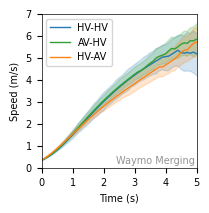

In [8]:
import seaborn as sns
import pandas as pd
v_threshold = 0.3

plt.figure(figsize=(2,2))
df = pd.DataFrame(columns=['timestamp', 'speed', 'vehicle type'])

for index, c in enumerate(conflict_list):
    if c.conflict_type == "MERGE" and c.two_vehicles_co_exist:
        mask = c.follower_beforeConflict_speeds_followerReach > v_threshold
        reversed_mask = mask[::-1]
        first_false_index = np.where(~reversed_mask)[0]
        
        if len(first_false_index) == 0:
            result = c.follower_beforeConflict_speeds_followerReach
        else:
            last_index = len(c.follower_beforeConflict_speeds_followerReach) - first_false_index[0]
            result = c.follower_beforeConflict_speeds_followerReach[last_index:]
            timestamp = [i * 0.1 for i in range(len(result))]
            types = [c.vehicle_order for _ in range(len(result))]

            temp_df = pd.DataFrame({
                'timestamp': timestamp, 
                'speed': result, 
                'vehicle type': types,
            })
            df = pd.concat([df, temp_df])

sns.lineplot(df, x="timestamp", y="speed", hue="vehicle type", palette=palette, hue_order=["HV-HV", "AV-HV", "HV-AV"],)
plt.xlim([0, 5])
plt.ylim([0, 7])
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.text(2.4, 0.2, "Waymo Merging", color='#949494')
plt.legend(loc=2)
# plt.savefig(f"./outputs/plots/waymo_speedProfile_Merge.png", dpi=400, bbox_inches="tight")
# df.to_csv("waymo_speedProfile_Merge.csv")

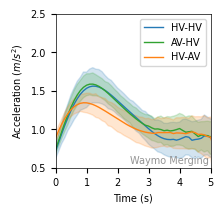

In [9]:
import seaborn as sns
import pandas as pd
v_threshold = 0.3

plt.figure(figsize=(2,2))
df = pd.DataFrame(columns=['timestamp', 'acc', 'vehicle type'])

for index, c in enumerate(conflict_list):
    if c.conflict_type == "MERGE" and c.two_vehicles_co_exist:
        mask = c.follower_beforeConflict_speeds_followerReach > v_threshold
        reversed_mask = mask[::-1]
        first_false_index = np.where(~reversed_mask)[0]
        
        if len(first_false_index) == 0:
            result = c.follower_beforeConflict_speeds_followerReach
        else:
            last_index = len(c.follower_beforeConflict_speeds_followerReach) - first_false_index[0]
            result = c.follower_beforeConflict_speeds_followerReach[last_index:]
            result = np.diff(result) / 0.1
            timestamp = [i * 0.1 for i in range(len(result))]
            types = [c.vehicle_order for _ in range(len(result))]

            temp_df = pd.DataFrame({
                'timestamp': timestamp, 
                'acc': result, 
                'vehicle type': types,
            })
            df = pd.concat([df, temp_df])

sns.lineplot(df, x="timestamp", y="acc", hue="vehicle type", palette=palette, hue_order=["HV-HV", "AV-HV", "HV-AV"],)
plt.xlim([0, 5])
plt.ylim([0.5, 2.5])
plt.xlabel("Time (s)")
plt.ylabel("Acceleration ($m/s^2$)")
plt.text(2.4, 0.55, "Waymo Merging", color='#949494')
plt.legend(loc=0)
plt.savefig(f"./outputs/plots/acc_waymo_merge.png", dpi=400, bbox_inches="tight")
# df.to_csv("waymo_speedProfile_Merge.csv")

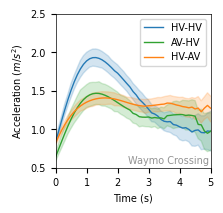

In [10]:
import seaborn as sns
import pandas as pd
v_threshold = 0.3

plt.figure(figsize=(2,2))
df = pd.DataFrame(columns=['timestamp', 'acc', 'vehicle type'])

for index, c in enumerate(conflict_list):
    if c.conflict_type == "CROSS" and c.two_vehicles_co_exist:
        mask = c.follower_beforeConflict_speeds_followerReach > v_threshold
        reversed_mask = mask[::-1]
        first_false_index = np.where(~reversed_mask)[0]
        
        if len(first_false_index) == 0:
            result = c.follower_beforeConflict_speeds_followerReach
        else:
            last_index = len(c.follower_beforeConflict_speeds_followerReach) - first_false_index[0]
            result = c.follower_beforeConflict_speeds_followerReach[last_index:]
            result = np.diff(result) / 0.1
            timestamp = [i * 0.1 for i in range(len(result))]
            types = [c.vehicle_order for _ in range(len(result))]

            temp_df = pd.DataFrame({
                'timestamp': timestamp, 
                'acc': result, 
                'vehicle type': types,
            })
            df = pd.concat([df, temp_df])

sns.lineplot(df, x="timestamp", y="acc", hue="vehicle type", palette=palette, hue_order=["HV-HV", "AV-HV", "HV-AV"],)
plt.xlim([0, 5])
plt.ylim([0.5, 2.5])
plt.xlabel("Time (s)")
plt.ylabel("Acceleration ($m/s^2$)")
plt.text(2.35, 0.55, "Waymo Crossing", color='#949494')
plt.legend(loc=0)
plt.savefig(f"./outputs/plots/acc_waymo_cross.png", dpi=400, bbox_inches="tight")
# df.to_csv("waymo_speedProfile_Merge.csv")

In [5]:
# Import necessary library for statistical analysis
from scipy.stats import ttest_ind, f_oneway, mannwhitneyu
import pandas as pd
import numpy as np

# Define the color palette
palette = {
    "HV-HV": '#257ab6',  # Blue
    "AV-HV": '#31a231',  # Green
    "HV-AV": '#ff8214',  # Orange
}

# Threshold for speed filtering
v_threshold = 0.3

# DataFrames to hold results
df_speed_cross = pd.DataFrame(columns=['average_speed', 'vehicle_type'])
df_acc_cross = pd.DataFrame(columns=['average_acceleration', 'vehicle_type'])
df_speed_merge = pd.DataFrame(columns=['average_speed', 'vehicle_type'])
df_acc_merge = pd.DataFrame(columns=['average_acceleration', 'vehicle_type'])

# Loop through conflicts to calculate average speed and acceleration
for index, c in enumerate(conflict_list):
    # Check if both vehicles exist and PET condition
    if c.two_vehicles_co_exist:
        # Process for CROSS conflicts
        if c.conflict_type == "CROSS":
            # Calculate average speed for CROSS
            mask = c.follower_beforeConflict_speeds_followerReach > v_threshold
            reversed_mask = mask[::-1]
            first_false_index = np.where(~reversed_mask)[0]

            if len(first_false_index) == 0:
                speed_result = c.follower_beforeConflict_speeds_followerReach
            else:
                last_index = len(c.follower_beforeConflict_speeds_followerReach) - first_false_index[0]
                speed_result = c.follower_beforeConflict_speeds_followerReach[last_index:]

            average_speed = np.mean(speed_result)
            temp_speed_df = pd.DataFrame({'average_speed': [average_speed], 'vehicle_type': [c.vehicle_order]})
            df_speed_cross = pd.concat([df_speed_cross, temp_speed_df], ignore_index=True)
            
            # Calculate average acceleration for CROSS
            acc_result = np.diff(speed_result) / 0.1
            average_acceleration = np.mean(acc_result)
            temp_acc_df = pd.DataFrame({'average_acceleration': [average_acceleration], 'vehicle_type': [c.vehicle_order]})
            df_acc_cross = pd.concat([df_acc_cross, temp_acc_df], ignore_index=True)

        # Process for MERGE conflicts
        if c.conflict_type == "MERGE":
            # Calculate average speed for MERGE
            mask = c.follower_beforeConflict_speeds_followerReach > v_threshold
            reversed_mask = mask[::-1]
            first_false_index = np.where(~reversed_mask)[0]

            if len(first_false_index) == 0:
                speed_result = c.follower_beforeConflict_speeds_followerReach
            else:
                last_index = len(c.follower_beforeConflict_speeds_followerReach) - first_false_index[0]
                speed_result = c.follower_beforeConflict_speeds_followerReach[last_index:]

            average_speed = np.mean(speed_result)
            temp_speed_df = pd.DataFrame({'average_speed': [average_speed], 'vehicle_type': [c.vehicle_order]})
            df_speed_merge = pd.concat([df_speed_merge, temp_speed_df], ignore_index=True)
            
            # Calculate average acceleration for MERGE
            acc_result = np.diff(speed_result) / 0.1
            average_acceleration = np.mean(acc_result)
            temp_acc_df = pd.DataFrame({'average_acceleration': [average_acceleration], 'vehicle_type': [c.vehicle_order]})
            df_acc_merge = pd.concat([df_acc_merge, temp_acc_df], ignore_index=True)

In [5]:
df_speed_cross.to_csv("./waymo_cross_vel.csv", index=False)
df_speed_merge.to_csv("./waymo_merge_vel.csv", index=False)
df_acc_cross.to_csv("./waymo_cross_acc.csv", index=False)
df_acc_merge.to_csv("./waymo_merge_acc.csv", index=False)

## Cross

speed

In [6]:
# Calculate mean and variance for each scenario and vehicle type

# Crossing Speeds
mean_speed_hv_hv_cross = df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-HV']['average_speed'].mean()
var_speed_hv_hv_cross = df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-HV']['average_speed'].var()

mean_speed_av_hv_cross = df_speed_cross[df_speed_cross['vehicle_type'] == 'AV-HV']['average_speed'].mean()
var_speed_av_hv_cross = df_speed_cross[df_speed_cross['vehicle_type'] == 'AV-HV']['average_speed'].var()

mean_speed_hv_av_cross = df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-AV']['average_speed'].mean()
var_speed_hv_av_cross = df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-AV']['average_speed'].var()

f_oneway(
    df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-HV']['average_speed'],
    df_speed_cross[df_speed_cross['vehicle_type'] == 'AV-HV']['average_speed'],
    df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-AV']['average_speed']
)

F_onewayResult(statistic=4.390534935777442, pvalue=0.012812327004485162)

In [20]:
mannwhitneyu(
    x=df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-HV']['average_speed'],
    y=df_speed_cross[df_speed_cross['vehicle_type'] == 'AV-HV']['average_speed'],
    alternative='two-sided',
).pvalue # pvalue=0.02660592964221422

mannwhitneyu(
    x=df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-HV']['average_speed'],
    y=df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-AV']['average_speed'],
    alternative='two-sided',
).pvalue # pvalue=0.019201873575894476

mannwhitneyu(
    x=df_speed_cross[df_speed_cross['vehicle_type'] == 'AV-HV']['average_speed'],
    y=df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-AV']['average_speed'],
    alternative='two-sided',
).pvalue # pvalue=0.816730999995443

0.816730999995443

In [22]:
ttest_ind(
    df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-HV']['average_speed'],
    df_speed_cross[df_speed_cross['vehicle_type'] == 'AV-HV']['average_speed'],).pvalue # 0.031768238578524614

ttest_ind(
    df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-HV']['average_speed'],
    df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-AV']['average_speed'],).pvalue # 0.009662218977576137

ttest_ind(
    df_speed_cross[df_speed_cross['vehicle_type'] == 'AV-HV']['average_speed'],
    df_speed_cross[df_speed_cross['vehicle_type'] == 'HV-AV']['average_speed'],).pvalue # 0.7933841356294588

0.7933841356294588

acceleration

In [9]:
# Crossing Accelerations
mean_acc_hv_hv_cross = df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-HV']['average_acceleration'].mean()
var_acc_hv_hv_cross = df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-HV']['average_acceleration'].var()

mean_acc_av_hv_cross = df_acc_cross[df_acc_cross['vehicle_type'] == 'AV-HV']['average_acceleration'].mean()
var_acc_av_hv_cross = df_acc_cross[df_acc_cross['vehicle_type'] == 'AV-HV']['average_acceleration'].var()

mean_acc_hv_av_cross = df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-AV']['average_acceleration'].mean()
var_acc_hv_av_cross = df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-AV']['average_acceleration'].var()

f_oneway(
    df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-HV']['average_acceleration'],
    df_acc_cross[df_acc_cross['vehicle_type'] == 'AV-HV']['average_acceleration'],
    df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-AV']['average_acceleration']
)

F_onewayResult(statistic=22.03623892189044, pvalue=6.009314969688387e-10)

In [16]:
mannwhitneyu(
    x=df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-HV']['average_acceleration'],
    y=df_acc_cross[df_acc_cross['vehicle_type'] == 'AV-HV']['average_acceleration'],
    alternative='two-sided',
) # pvalue=6.085747526865661e-06

mannwhitneyu(
    x=df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-HV']['average_acceleration'],
    y=df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-AV']['average_acceleration'],
    alternative='two-sided',
) # pvalue=0.22615649252950232

mannwhitneyu(
    x=df_acc_cross[df_acc_cross['vehicle_type'] == 'AV-HV']['average_acceleration'],
    y=df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-AV']['average_acceleration'],
    alternative='two-sided',
) # pvalue=2.400192659111373e-09)

MannwhitneyuResult(statistic=6609.0, pvalue=2.400192659111373e-09)

In [18]:
ttest_ind(
    df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-HV']['average_acceleration'],
    df_acc_cross[df_acc_cross['vehicle_type'] == 'AV-HV']['average_acceleration'],    
).pvalue # 4.150830608351073e-06

ttest_ind(
    df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-HV']['average_acceleration'],
    df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-AV']['average_acceleration'],    
).pvalue # 0.033637695311367594

ttest_ind(
    df_acc_cross[df_acc_cross['vehicle_type'] == 'AV-HV']['average_acceleration'],
    df_acc_cross[df_acc_cross['vehicle_type'] == 'HV-AV']['average_acceleration'],    
).pvalue # 3.2612160918250248e-12

3.2612160918250248e-12

## Merge

In [23]:
# Merging Speeds
mean_speed_hv_hv_merge = df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-HV']['average_speed'].mean()
var_speed_hv_hv_merge = df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-HV']['average_speed'].var()

mean_speed_av_hv_merge = df_speed_merge[df_speed_merge['vehicle_type'] == 'AV-HV']['average_speed'].mean()
var_speed_av_hv_merge = df_speed_merge[df_speed_merge['vehicle_type'] == 'AV-HV']['average_speed'].var()

mean_speed_hv_av_merge = df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-AV']['average_speed'].mean()
var_speed_hv_av_merge = df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-AV']['average_speed'].var()

f_oneway(
    df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-HV']['average_speed'],
    df_speed_merge[df_speed_merge['vehicle_type'] == 'AV-HV']['average_speed'],
    df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-AV']['average_speed']
)

F_onewayResult(statistic=1.723092169472295, pvalue=0.18038077618303708)

In [25]:
mannwhitneyu(
    x=df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-HV']['average_speed'],
    y=df_speed_merge[df_speed_merge['vehicle_type'] == 'AV-HV']['average_speed'],
    alternative='two-sided',
).pvalue # pvalue=0.9641328596493453

mannwhitneyu(
    x=df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-HV']['average_speed'],
    y=df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-AV']['average_speed'],
    alternative='two-sided',
).pvalue # pvalue=0.2770384802572189

mannwhitneyu(
    x=df_speed_merge[df_speed_merge['vehicle_type'] == 'AV-HV']['average_speed'],
    y=df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-AV']['average_speed'],
    alternative='two-sided',
).pvalue # pvalue=0.2744544653156318

0.2744544653156318

In [27]:
ttest_ind(
    df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-HV']['average_speed'],
    df_speed_merge[df_speed_merge['vehicle_type'] == 'AV-HV']['average_speed'],    
).pvalue # 0.18771620856954443

ttest_ind(
    df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-HV']['average_speed'],
    df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-AV']['average_speed'],    
).pvalue # 0.13971339241059558

ttest_ind(
    df_speed_merge[df_speed_merge['vehicle_type'] == 'AV-HV']['average_speed'],
    df_speed_merge[df_speed_merge['vehicle_type'] == 'HV-AV']['average_speed'],    
).pvalue # 0.3682724038329924

0.3682724038329924

In [28]:
# Merging Accelerations
mean_acc_hv_hv_merge = df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-HV']['average_acceleration'].mean()
var_acc_hv_hv_merge = df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-HV']['average_acceleration'].var()

mean_acc_av_hv_merge = df_acc_merge[df_acc_merge['vehicle_type'] == 'AV-HV']['average_acceleration'].mean()
var_acc_av_hv_merge = df_acc_merge[df_acc_merge['vehicle_type'] == 'AV-HV']['average_acceleration'].var()

mean_acc_hv_av_merge = df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-AV']['average_acceleration'].mean()
var_acc_hv_av_merge = df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-AV']['average_acceleration'].var()

f_oneway(
    df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-HV']['average_acceleration'],
    df_acc_merge[df_acc_merge['vehicle_type'] == 'AV-HV']['average_acceleration'],
    df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-AV']['average_acceleration']
)

F_onewayResult(statistic=8.067247167721893, pvalue=0.00039144561578597384)

In [30]:
mannwhitneyu(
    x=df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-HV']['average_acceleration'],
    y=df_acc_merge[df_acc_merge['vehicle_type'] == 'AV-HV']['average_acceleration'],
    alternative='two-sided',
).pvalue # pvalue=0.5011982135900467

mannwhitneyu(
    x=df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-HV']['average_acceleration'],
    y=df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-AV']['average_acceleration'],
    alternative='two-sided',
).pvalue # pvalue=0.0003894303614412341

mannwhitneyu(
    x=df_acc_merge[df_acc_merge['vehicle_type'] == 'AV-HV']['average_acceleration'],
    y=df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-AV']['average_acceleration'],
    alternative='two-sided',
).pvalue # pvalue=0.0031478459727454157

0.0031478459727454157

In [31]:
ttest_ind(
    df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-HV']['average_acceleration'],
    df_acc_merge[df_acc_merge['vehicle_type'] == 'AV-HV']['average_acceleration'],    
).pvalue # 0.6123784793945133

ttest_ind(
    df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-HV']['average_acceleration'],
    df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-AV']['average_acceleration'],    
).pvalue # 0.00022130301395267938

ttest_ind(
    df_acc_merge[df_acc_merge['vehicle_type'] == 'AV-HV']['average_acceleration'],
    df_acc_merge[df_acc_merge['vehicle_type'] == 'HV-AV']['average_acceleration'],    
).pvalue # 0.00017732404109891575

0.00017732404109891575